In [1]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

In [3]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['C:\\Users\\ishwo\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\ishwo\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\ishwo\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\ishwo\\AppData\\Local\\Programs\\Python\\Python312', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV', '', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV\\Lib\\site-packages', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV\\Lib\\site-packages\\win32', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV\\Lib\\site-packages\\Pythonwin']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

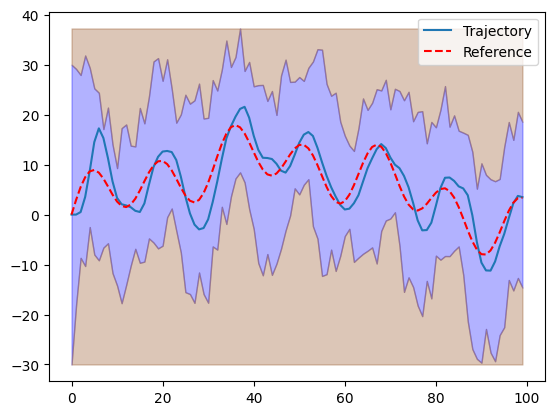

In [10]:
# Import relevant modules
import sys
import os

# Add the B1-CODING-PRACTICAL-MT24 directory to the Python path
sys.path.append(os.path.abspath('..'))

# Import custom classes and functions
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController

sub = Submarine()
controller = PDController(K_P=0.15, K_D=0.6)
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv") # You must implement this method in the Mission class

trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)